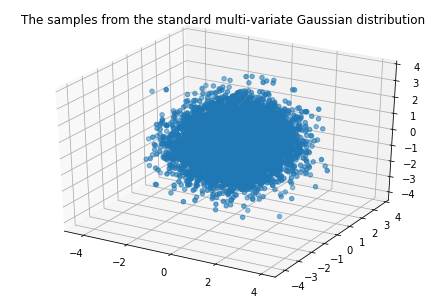

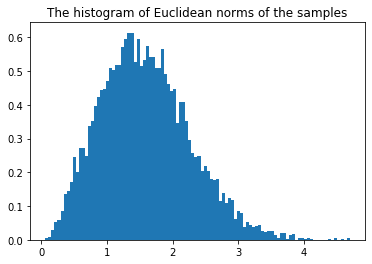

When d=3, The averange of the norms is：  1.5863755181540868  The standard devition is:  0.6804970473134331


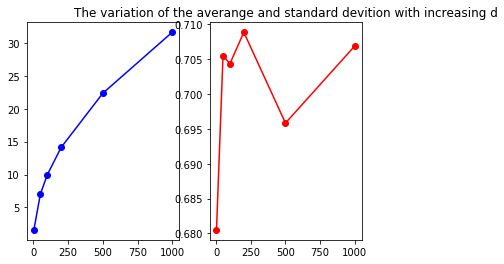

In [8]:
# Question 3: Gaussian distribution

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

########### a: generate 10,000 random samples from the standard multi-variate Gaussian distribution ##########

d = 3
samplesNum = 10000

#generate samples
samples = np.random.randn(samplesNum, d)
#print(samples)    #use this line to see how samples look like

#draw the 3d image of the samples
fig = plt.figure(1)
ax = Axes3D(fig)
x = samples[:,0]
y = samples[:,1]
z = samples[:,2]
plt.title('The samples from the standard multi-variate Gaussian distribution')
ax.scatter(x, y, z)

#################### b: Compute and plot the histogram of Euclidean norms of the samples ###################
####################    Calculate the averange and standard devition                     ###################

#compute the Euclidean norms of the samples 
samples2Norm = np.linalg.norm(samples, ord = 2, axis = 1, keepdims = True)
#print(samples2Norm)    #use this line to see how norms look like

#plot the histogram
plt.figure(2)
plt.hist(samples2Norm, 100, density = True)
plt.title('The histogram of Euclidean norms of the samples')
plt.show()

#calculate the averange and standard devition
ave = [0, 0, 0, 0, 0, 0]    #store the averange of the norms when d=3, 50, 100, 200, 500, 1000
ave[0] = np.mean(samples2Norm)
std = [0, 0, 0, 0, 0, 0]    #store the standard devition of the norms when d=3, 50, 100, 200, 500, 1000
std[0] = np.std(samples2Norm, ddof = 1)
print('When d=3, The averange of the norms is： ', ave[0], ' The standard devition is: ', std[0] )

############## c: plot the variation of the averange and standard devition with increasing d ##############

d = 50
samples = np.random.randn(samplesNum, d)
samples2Norm = np.linalg.norm(samples, ord = 2, axis = 1, keepdims = True)
ave[1] = np.mean(samples2Norm)
std[1] = np.std(samples2Norm, ddof = 1)

d = 100
samples = np.random.randn(samplesNum, d)
samples2Norm = np.linalg.norm(samples, ord = 2, axis = 1, keepdims = True)
ave[2] = np.mean(samples2Norm)
std[2] = np.std(samples2Norm, ddof = 1)

d = 200
samples = np.random.randn(samplesNum, d)
samples2Norm = np.linalg.norm(samples, ord = 2, axis = 1, keepdims = True)
ave[3] = np.mean(samples2Norm)
std[3] = np.std(samples2Norm, ddof = 1)

d = 500
samples = np.random.randn(samplesNum, d)
samples2Norm = np.linalg.norm(samples, ord = 2, axis = 1, keepdims = True)
ave[4] = np.mean(samples2Norm)
std[4] = np.std(samples2Norm, ddof = 1)

d = 1000
samples = np.random.randn(samplesNum, d)
samples2Norm = np.linalg.norm(samples, ord = 2, axis = 1, keepdims = True)
ave[5] = np.mean(samples2Norm)
std[5] = np.std(samples2Norm, ddof = 1)

#print(ave)    #use these to see how ave and std look like
#print(std)

#draw a line char to show the variation when d increasing
plt.figure(3)
x = [3, 50, 100, 200, 500, 1000]
plt.subplot(121)
plt.plot(x, ave, 'bo-', label = 'averange')
plt.subplot(122)
plt.plot(x, std, 'ro-', label = 'standard deviation')
plt.title('The variation of the averange and standard devition with increasing d')
plt.show()

###################################### d: My conclusion from plot #######################################
#### When d increasing, the averange of the norms increases and the standard devition remains stable. ###
#########################################################################################################



In [12]:
# Question 4: text retrieval system

import re
import math
import numpy as np
from collections import defaultdict
from collections import OrderedDict

######################### a: Read each document and convert it into a vector of words ######################

foq = open("d_query.txt",'r')                    #open file
fq = foq.read()                                  #read file
fqVect = re.split(r'(?:[,.;:\n\'\" ])', fq)      #convert long string to a vector of words
fqVect = list(filter(None,fqVect))               #filt the empty words
#print(fqVect)                                   #use this line to see how vector looks like

fo1 = open("d1.txt",'r')
f1 = fo1.read()
f1Vect = re.split(r'(?:[,.;:\n\'\" \(\)])', f1)
f1Vect = list(filter(None,f1Vect))
f1Vect = [s.lower() for s in f1Vect]

fo2 = open("d2.txt",'r')
f2 = fo2.read()
f2Vect = re.split(r'(?:[,.;:\n\'\" \(\)])', f2)
f2Vect = list(filter(None,f2Vect))
f2Vect = [s.lower() for s in f2Vect]

fo3 = open("d3.txt",'r')
f3 = fo3.read()
f3Vect = re.split(r'(?:[,.;:\n\'\" \(\)])', f3)
f3Vect = list(filter(None,f3Vect))
f3Vect = [s.lower() for s in f3Vect]

fo4 = open("d4.txt",'r')
f4 = fo4.read()
f4Vect = re.split(r'(?:[,.;:\n\'\" \(\)])', f4)
f4Vect = list(filter(None,f4Vect))
f4Vect = [s.lower() for s in f4Vect]

fo5 = open("d5.txt",'r')
f5 = fo5.read()
f5Vect = re.split(r'(?:[,.;:\n\'\" \(\)])', f5)
f5Vect = list(filter(None,f5Vect))
f5Vect = [s.lower() for s in f5Vect]
#print(f5Vect)

wordLists = fqVect + f1Vect + f2Vect + f3Vect + f4Vect + f5Vect    # a list storing all words in 6 files with the repeating words
wordListsTable = [fqVect] + [f1Vect] + [f2Vect] + [f3Vect] + [f4Vect] + [f5Vect]  #a list of lists storing all words in 6 file respectively
wordset = list(set(wordLists))    # a list storing all words in 6 file without repeating words
#print(wordset)
print('The number of the words without repeating words is: ', len(wordset))

######################### b: Compute tf-idf values for each word in every document ######################

wordsNum = len(wordset)
wordFrequency = [{}, {}, {}, {}, {}, {}]    # a list of dictionaries storing the frequency of each word in every document
                                            # wordFrequency[i][word] representing the frequency of the word 'word' No.i file 
for i in [0, 1, 2, 3, 4, 5] :
    wordFrequency[i] = defaultdict(int)     # make the values of dictionaries be int type so that can increase frequency directly

# Compute frequency of each word in every document
index = 0
for wordDoc in wordListsTable :       #every document      
    for word in wordDoc :             #each word
        wordFrequency[index][word] += 1
    index += 1

# Compute tf values of each word in every document
wordTF = [{}, {}, {}, {}, {}, {}]           # similar to the wordFrequency[i][word]
for i in [0, 1, 2, 3, 4, 5] :
    for word in wordFrequency[i] :
        wordTF[i][word] = wordFrequency[i][word]/sum(wordFrequency[i].values())
    
# Compute idf values of each word in all ducument
docNum = 6
wordIDF = {}                          # a dictionary storing the idf values of each word in all ducument
docContainWordNum=defaultdict(int)    # a dictionary storing the number of document which contain the word 'word'
for word in wordset :
    for wordlist in wordListsTable :
        if word in wordlist :
            docContainWordNum[word] += 1
for word in wordset :
    wordIDF[word] = math.log(docNum/(docContainWordNum[word] + 1))
    
# Compute tf-idf values of each word in every document
word_TF_IDF = [{}, {}, {}, {}, {}, {}]      # similar to the wordFrequency[i][word]
for i in [0, 1, 2, 3, 4, 5] :
    word_TF_IDF[i] = defaultdict(int)
for i in [0, 1, 2, 3, 4, 5] :
    for word in wordFrequency[i] :
        if wordTF[i][word]*wordIDF[word] >= 0 :
            word_TF_IDF[i][word] = wordTF[i][word]*wordIDF[word]
        else :
            word_TF_IDF[i][word] = 0
    
#print(word_TF_IDF)
#print(len(wordFrequency))

############ c: Compute the cosine similarity between tf-idf vectors of each document and query ###########

# if a word does not show up in a document set its tf-idf values to  0
for i in [0, 1, 2, 3, 4, 5] :
    for word in wordset :
        if word in word_TF_IDF[i] :
            continue
        else :
            word_TF_IDF[i][word] = 0
            
# the function of calculating the cosine similarity between vector x and y
def cosine_similarity(x, y, norm=False):
    assert len(x) == len(y), "len(x) != len(y)"    #only when the length of two vectors is the same , it can be calculate
    res = np.array([[x[i] * y[i], x[i] * x[i], y[i] * y[i]] for i in range(len(x))])
    cos = sum(res[:, 0]) / (np.sqrt(sum(res[:, 1])) * np.sqrt(sum(res[:, 2])))
    return 0.5 * cos + 0.5 if norm else cos

#the function of making each dictionary sorted by keys 
#so that the order of each word in vectors is the same
def sort_key(old_dict, reverse=False):
    keys = sorted(old_dict.keys(), reverse=reverse)
    new_dict = OrderedDict()
    for key in keys:
        new_dict[key] = old_dict[key]
    return new_dict

#sort each dictionary by keys
for i in [0, 1, 2, 3, 4, 5] :
    word_TF_IDF[i] = sort_key(word_TF_IDF[i]) 

#print(word_TF_IDF)
#print(len(word_TF_IDF[0]),len(word_TF_IDF[1]),len(word_TF_IDF[2]),len(word_TF_IDF[3]),len(word_TF_IDF[4]),len(word_TF_IDF[5]))
#print(word_TF_IDF[0].values())

#Compute the cosine similarity
cos_sim = [0, 0, 0, 0, 0]  
for i in [1, 2, 3, 4, 5] :
    cos_sim[i-1] = cosine_similarity(list(word_TF_IDF[0].values()), list(word_TF_IDF[i].values()))

print('The cosine similarity between d1-d5 files\' tf-idf vectors of each document and the query is: ' )
print(cos_sim)

###################### d: Report the document with the maximum similarity value ########################

docIndex = cos_sim.index(max(cos_sim))
if docIndex == 0:
    docName = 'd1.txt'
elif docIndex == 1:
    docName = 'd2.txt'
elif docIndex == 2:
    docName = 'd3.txt'
elif docIndex == 3:
    docName = 'd4.txt'
else:
    docName = 'd5.txt'
print('The document with the maximum similarity value is:', docName)


The number of the words without repeating words is:  573
The cosine similarity between d1-d5 files' tf-idf vectors of each document and the query is: 
[0.0, 0.0, 0.0, 0.20664214216675447, 0.0]
The document with the maximum similarity value is: d4.txt


In [ ]:
######################### Question 5: Time spending on this assignment ########################
######################### Time = 2h + 2h + 2h + 6h = 12h               ########################